## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Modelling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import f1_score, accuracy_score

# Saving the model
import joblib

## Load the Data

In [2]:
df = pd.read_csv("../input/khulna-weather-dataset/khulna.csv")

df.shape

(3651, 30)

## Exploratory Data Analysis

In [3]:
df.head()

,datetime,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions
0,2012-01-01,"khulna,Bangladesh",31.0,15.7,22.2,29.6,15.7,22.0,12.7,58.3,0.0,0.0,0.00,NaN,NaN,NaN,NaN,13.0,356.8,1014.3,21.0,4.2,182.8,15.6,7.0,NaN,2012-01-01T06:42:23,2012-01-01T17:27:46,0.25,Partially cloudy
1,2012-01-02,"khulna,Bangladesh",30.2,17.0,22.3,29.4,17.0,22.1,14.6,64.8,1.0,100.0,25.00,rain,NaN,NaN,NaN,13.3,2.1,1014.3,32.3,5.2,176.0,15.1,7.0,NaN,2012-01-02T06:42:42,2012-01-02T17:28:25,0.27,"Rain, Partially cloudy"
2,2012-01-03,"khulna,Bangladesh",28.2,16.9,21.3,28.1,16.9,21.3,15.7,72.7,0.2,100.0,8.33,rain,NaN,NaN,NaN,10.1,340.7,1013.9,29.1,3.0,166.4,14.3,6.0,NaN,2012-01-03T06:42:59,2012-01-03T17:29:03,0.31,"Rain, Partially cloudy"
3,2012-01-04,"khulna,Bangladesh",26.6,16.1,21.0,26.6,16.1,21.0,14.5,68.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,8.6,3.9,1013.7,23.7,4.9,131.8,11.4,6.0,NaN,2012-01-04T06:43:16,2012-01-04T17:29:43,0.34,Partially cloudy
4,2012-01-05,"khulna,Bangladesh",28.5,15.9,21.6,28.1,15.9,21.6,14.9,68.5,0.4,100.0,16.67,rain,NaN,NaN,NaN,7.2,8.9,1014.6,20.7,3.8,159.4,13.7,6.0,NaN,2012-01-05T06:43:31,2012-01-05T17:30:23,0.37,"Rain, Partially cloudy"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          3651 non-null   object 
 1   name              3651 non-null   object 
 2   tempmax           3651 non-null   float64
 3   tempmin           3651 non-null   float64
 4   temp              3651 non-null   float64
 5   feelslikemax      3651 non-null   float64
 6   feelslikemin      3651 non-null   float64
 7   feelslike         3651 non-null   float64
 8   dew               3651 non-null   float64
 9   humidity          3651 non-null   float64
 10  precip            3651 non-null   float64
 11  precipprob        3651 non-null   float64
 12  precipcover       3651 non-null   float64
 13  preciptype        1864 non-null   object 
 14  snow              665 non-null    float64
 15  snowdepth         668 non-null    float64
 16  windgust          689 non-null    float64


Columns `datetime`, `sunrise` and `sunset` are in object data type, we need to convert them to datetime

In [5]:
# Convert the date columns to datetime objects

df['datetime'] = pd.to_datetime(df['datetime'])
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          3651 non-null   datetime64[ns]
 1   name              3651 non-null   object        
 2   tempmax           3651 non-null   float64       
 3   tempmin           3651 non-null   float64       
 4   temp              3651 non-null   float64       
 5   feelslikemax      3651 non-null   float64       
 6   feelslikemin      3651 non-null   float64       
 7   feelslike         3651 non-null   float64       
 8   dew               3651 non-null   float64       
 9   humidity          3651 non-null   float64       
 10  precip            3651 non-null   float64       
 11  precipprob        3651 non-null   float64       
 12  precipcover       3651 non-null   float64       
 13  preciptype        1864 non-null   object        
 14  snow              665 no

In [7]:
df.columns

Index(['datetime', 'name', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions'],
      dtype='object')

In [8]:
## Dropping some columns, which have no relevance

df.drop(columns=['name', 'snow'], axis=1, inplace=True)

df = df.copy()

In [9]:
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions
0,2012-01-01,31.0,15.7,22.2,29.6,15.7,22.0,12.7,58.3,0.0,0.0,0.00,NaN,NaN,NaN,13.0,356.8,1014.3,21.0,4.2,182.8,15.6,7.0,NaN,2012-01-01 06:42:23,2012-01-01 17:27:46,0.25,Partially cloudy
1,2012-01-02,30.2,17.0,22.3,29.4,17.0,22.1,14.6,64.8,1.0,100.0,25.00,rain,NaN,NaN,13.3,2.1,1014.3,32.3,5.2,176.0,15.1,7.0,NaN,2012-01-02 06:42:42,2012-01-02 17:28:25,0.27,"Rain, Partially cloudy"
2,2012-01-03,28.2,16.9,21.3,28.1,16.9,21.3,15.7,72.7,0.2,100.0,8.33,rain,NaN,NaN,10.1,340.7,1013.9,29.1,3.0,166.4,14.3,6.0,NaN,2012-01-03 06:42:59,2012-01-03 17:29:03,0.31,"Rain, Partially cloudy"
3,2012-01-04,26.6,16.1,21.0,26.6,16.1,21.0,14.5,68.0,0.0,0.0,0.00,NaN,NaN,NaN,8.6,3.9,1013.7,23.7,4.9,131.8,11.4,6.0,NaN,2012-01-04 06:43:16,2012-01-04 17:29:43,0.34,Partially cloudy
4,2012-01-05,28.5,15.9,21.6,28.1,15.9,21.6,14.9,68.5,0.4,100.0,16.67,rain,NaN,NaN,7.2,8.9,1014.6,20.7,3.8,159.4,13.7,6.0,NaN,2012-01-05 06:43:31,2012-01-05 17:30:23,0.37,"Rain, Partially cloudy"


In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,3651,2018-09-20 20:24:15.382087168,2012-01-01 00:00:00,2016-01-30 12:00:00,2019-01-01 00:00:00,2021-07-01 12:00:00,2023-12-31 00:00:00,NaN
tempmax,3651.0,32.152424,17.6,29.4,32.1,35.0,43.4,4.177207
tempmin,3651.0,21.494111,6.2,17.3,23.6,26.1,29.8,5.443166
temp,3651.0,26.099726,13.1,23.0,27.8,29.2,34.4,4.414402
feelslikemax,3651.0,36.037004,0.0,29.7,37.7,42.4,61.6,8.480497
feelslikemin,3651.0,21.703177,0.0,17.1,23.6,26.1,37.9,6.748823
feelslike,3651.0,28.752041,12.7,23.2,30.0,34.2,42.7,6.549829
dew,3651.0,20.093098,-1.1,15.5,22.0,25.8,27.8,6.330895
humidity,3651.0,73.717392,22.9,64.5,75.9,85.4,96.4,14.194005
precip,3651.0,5.855355,0.0,0.0,0.1,6.4,209.6,13.399563


In [11]:
## Check for missing values

df.isnull().sum()

datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1787
snowdepth           2983
windgust            2962
windspeed              0
winddir                0
sealevelpressure     601
cloudcover             0
visibility           602
solarradiation        56
solarenergy           56
uvindex               56
severerisk          2986
sunrise                0
sunset                 0
moonphase              0
conditions             0
dtype: int64

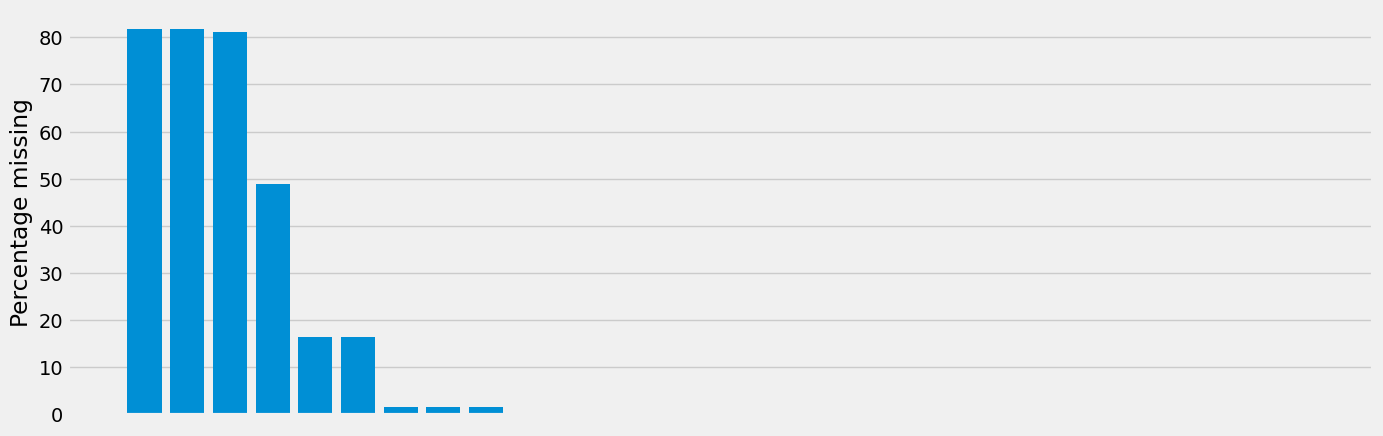

In [12]:
## Checking the % of missing values 

# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show();

Here, we can see that there are features which have more than 80% missing values, we dont find any relevance of those features, let's drop them.

In [13]:
## Dropping columns which has more than 70% of missing values

dropcols = missing[missing[0]>70]
dropcols

,0
severerisk,81.785812
snowdepth,81.703643
windgust,81.128458


In [14]:
## Dropping the columns with more than 70% missing values

df.drop(list(dropcols.index), axis=1, inplace=True)

df = df.copy()

In [15]:
df.shape

(3651, 25)

In [16]:
df.isnull().sum()

datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1787
windspeed              0
winddir                0
sealevelpressure     601
cloudcover             0
visibility           602
solarradiation        56
solarenergy           56
uvindex               56
sunrise                0
sunset                 0
moonphase              0
conditions             0
dtype: int64

We still have some missing values, we will handle them later directly in the Pipeline.

In [17]:
# Defining a function to check the summary of the data
def summary(df):
    data=pd.DataFrame(index=df.columns)
    data['dtypes']=df.dtypes
    data['count']=df.count()
    data['#unique']=df.nunique()
    data['duplicate'] = df.duplicated().sum()
    data['#missing']=df.isna().sum()
    data['missing%']=df.isna().sum()/len(df)*100
    data=pd.concat([data,df.describe().T.drop('count',axis=1)],axis=1)
    return data

In [18]:
summary(df).style.background_gradient(cmap='YlGnBu')

,dtypes,count,#unique,duplicate,#missing,missing%,mean,min,25%,50%,75%,max,std
datetime,datetime64[ns],3651,3530,121,0,0.000000,2018-09-20 20:24:15.382087168,2012-01-01 00:00:00,2016-01-30 12:00:00,2019-01-01 00:00:00,2021-07-01 12:00:00,2023-12-31 00:00:00,nan
tempmax,float64,3651,224,121,0,0.000000,32.152424,17.600000,29.400000,32.100000,35.000000,43.400000,4.177207
tempmin,float64,3651,228,121,0,0.000000,21.494111,6.200000,17.300000,23.600000,26.100000,29.800000,5.443166
temp,float64,3651,204,121,0,0.000000,26.099726,13.100000,23.000000,27.800000,29.200000,34.400000,4.414402
feelslikemax,float64,3651,326,121,0,0.000000,36.037004,0.000000,29.700000,37.700000,42.400000,61.600000,8.480497
feelslikemin,float64,3651,277,121,0,0.000000,21.703177,0.000000,17.100000,23.600000,26.100000,37.900000,6.748823
feelslike,float64,3651,282,121,0,0.000000,28.752041,12.700000,23.200000,30.000000,34.200000,42.700000,6.549829
dew,float64,3651,252,121,0,0.000000,20.093098,-1.100000,15.500000,22.000000,25.800000,27.800000,6.330895
humidity,float64,3651,597,121,0,0.000000,73.717392,22.900000,64.500000,75.900000,85.400000,96.400000,14.194005
precip,float64,3651,399,121,0,0.000000,5.855355,0.000000,0.000000,0.100000,6.400000,209.600000,13.399563


We can see duplicates also in the dataset, let's remove them from the dataset

In [19]:
# Remove duplicate rows
df = df.drop_duplicates()

df.copy()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2012-01-01,31.0,15.7,22.2,29.6,15.7,22.0,12.7,58.3,0.0,0.0,0.00,NaN,13.0,356.8,1014.3,21.0,4.2,182.8,15.6,7.0,2012-01-01 06:42:23,2012-01-01 17:27:46,0.25,Partially cloudy
1,2012-01-02,30.2,17.0,22.3,29.4,17.0,22.1,14.6,64.8,1.0,100.0,25.00,rain,13.3,2.1,1014.3,32.3,5.2,176.0,15.1,7.0,2012-01-02 06:42:42,2012-01-02 17:28:25,0.27,"Rain, Partially cloudy"
2,2012-01-03,28.2,16.9,21.3,28.1,16.9,21.3,15.7,72.7,0.2,100.0,8.33,rain,10.1,340.7,1013.9,29.1,3.0,166.4,14.3,6.0,2012-01-03 06:42:59,2012-01-03 17:29:03,0.31,"Rain, Partially cloudy"
3,2012-01-04,26.6,16.1,21.0,26.6,16.1,21.0,14.5,68.0,0.0,0.0,0.00,NaN,8.6,3.9,1013.7,23.7,4.9,131.8,11.4,6.0,2012-01-04 06:43:16,2012-01-04 17:29:43,0.34,Partially cloudy
4,2012-01-05,28.5,15.9,21.6,28.1,15.9,21.6,14.9,68.5,0.4,100.0,16.67,rain,7.2,8.9,1014.6,20.7,3.8,159.4,13.7,6.0,2012-01-05 06:43:31,2012-01-05 17:30:23,0.37,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,2023-12-27,23.0,12.5,17.4,0.0,0.0,27.7,13.8,82.1,0.8,0.0,0.00,NaN,2.9,319.2,1014.7,8.5,3.5,NaN,NaN,NaN,2023-12-27 06:40:36,2023-12-27 17:24:49,0.50,Clear
3647,2023-12-28,23.0,13.1,17.4,0.0,0.0,23.0,13.8,81.9,0.2,0.0,0.00,NaN,1.8,214.5,1015.0,8.5,3.5,NaN,NaN,NaN,2023-12-28 06:41:00,2023-12-28 17:25:24,0.54,Clear
3648,2023-12-29,23.6,13.0,17.7,0.0,0.0,23.6,13.7,80.2,0.0,0.0,0.00,NaN,2.2,270.9,1014.9,4.8,3.1,NaN,NaN,NaN,2023-12-29 06:41:23,2023-12-29 17:26:00,0.57,Clear
3649,2023-12-30,22.6,12.7,17.1,0.0,0.0,27.7,13.6,82.3,0.0,0.0,0.00,NaN,1.4,281.7,1015.0,10.3,3.1,NaN,NaN,NaN,2023-12-30 06:41:45,2023-12-30 17:26:36,0.60,Clear


In [20]:
summary(df).style.background_gradient(cmap='YlGnBu')

,dtypes,count,#unique,duplicate,#missing,missing%,mean,min,25%,50%,75%,max,std
datetime,datetime64[ns],3530,3530,0,0,0.000000,2018-10-22 20:38:53.371104768,2012-01-01 00:00:00,2016-01-30 06:00:00,2019-03-02 12:00:00,2021-07-31 18:00:00,2023-12-31 00:00:00,nan
tempmax,float64,3530,224,0,0,0.000000,32.079263,17.600000,29.400000,32.100000,34.900000,43.400000,4.132062
tempmin,float64,3530,228,0,0,0.000000,21.537677,6.200000,17.400000,23.700000,26.100000,29.800000,5.452122
temp,float64,3530,204,0,0,0.000000,26.096261,13.100000,23.000000,27.800000,29.200000,34.400000,4.400769
feelslikemax,float64,3530,326,0,0,0.000000,36.063428,0.000000,29.700000,37.850000,42.400000,61.600000,8.533453
feelslikemin,float64,3530,277,0,0,0.000000,21.739008,0.000000,17.200000,23.700000,26.100000,37.900000,6.776757
feelslike,float64,3530,282,0,0,0.000000,28.797847,12.700000,23.300000,30.200000,34.200000,42.700000,6.551545
dew,float64,3530,252,0,0,0.000000,20.187535,-1.100000,15.500000,22.200000,25.800000,27.800000,6.342988
humidity,float64,3530,597,0,0,0.000000,74.071586,22.900000,65.000000,76.500000,85.700000,96.400000,14.248071
precip,float64,3530,399,0,0,0.000000,6.022635,0.000000,0.000000,0.200000,6.675000,209.600000,13.572304


Now there are no duplicates, let's proceed. 

In [21]:
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2012-01-01,31.0,15.7,22.2,29.6,15.7,22.0,12.7,58.3,0.0,0.0,0.00,NaN,13.0,356.8,1014.3,21.0,4.2,182.8,15.6,7.0,2012-01-01 06:42:23,2012-01-01 17:27:46,0.25,Partially cloudy
1,2012-01-02,30.2,17.0,22.3,29.4,17.0,22.1,14.6,64.8,1.0,100.0,25.00,rain,13.3,2.1,1014.3,32.3,5.2,176.0,15.1,7.0,2012-01-02 06:42:42,2012-01-02 17:28:25,0.27,"Rain, Partially cloudy"
2,2012-01-03,28.2,16.9,21.3,28.1,16.9,21.3,15.7,72.7,0.2,100.0,8.33,rain,10.1,340.7,1013.9,29.1,3.0,166.4,14.3,6.0,2012-01-03 06:42:59,2012-01-03 17:29:03,0.31,"Rain, Partially cloudy"
3,2012-01-04,26.6,16.1,21.0,26.6,16.1,21.0,14.5,68.0,0.0,0.0,0.00,NaN,8.6,3.9,1013.7,23.7,4.9,131.8,11.4,6.0,2012-01-04 06:43:16,2012-01-04 17:29:43,0.34,Partially cloudy
4,2012-01-05,28.5,15.9,21.6,28.1,15.9,21.6,14.9,68.5,0.4,100.0,16.67,rain,7.2,8.9,1014.6,20.7,3.8,159.4,13.7,6.0,2012-01-05 06:43:31,2012-01-05 17:30:23,0.37,"Rain, Partially cloudy"


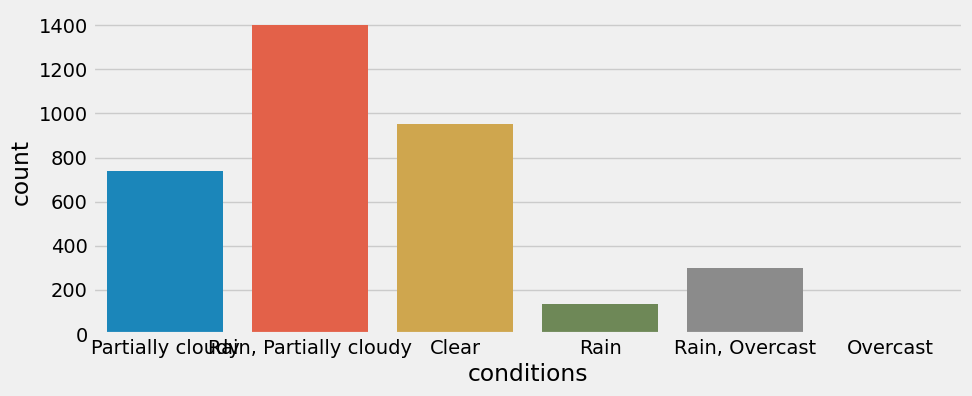

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(df, x="conditions")
plt.show();

In [23]:
# Create a mapping for binning
weather_mapping = {
    'Rain, Partially cloudy': 'Rainy Weather',
    'Rain': 'Rainy Weather',
    'Rain, Overcast': 'Rainy Weather',
    'Rain, Fog': 'Rainy Weather',
    'Partially cloudy': 'Partially Cloudy',
    'Clear': 'Clear Weather',
    'Overcast': 'Overcast'
}

df['conditions'] = df['conditions'].map(weather_mapping)

In [24]:
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2012-01-01,31.0,15.7,22.2,29.6,15.7,22.0,12.7,58.3,0.0,0.0,0.00,NaN,13.0,356.8,1014.3,21.0,4.2,182.8,15.6,7.0,2012-01-01 06:42:23,2012-01-01 17:27:46,0.25,Partially Cloudy
1,2012-01-02,30.2,17.0,22.3,29.4,17.0,22.1,14.6,64.8,1.0,100.0,25.00,rain,13.3,2.1,1014.3,32.3,5.2,176.0,15.1,7.0,2012-01-02 06:42:42,2012-01-02 17:28:25,0.27,Rainy Weather
2,2012-01-03,28.2,16.9,21.3,28.1,16.9,21.3,15.7,72.7,0.2,100.0,8.33,rain,10.1,340.7,1013.9,29.1,3.0,166.4,14.3,6.0,2012-01-03 06:42:59,2012-01-03 17:29:03,0.31,Rainy Weather
3,2012-01-04,26.6,16.1,21.0,26.6,16.1,21.0,14.5,68.0,0.0,0.0,0.00,NaN,8.6,3.9,1013.7,23.7,4.9,131.8,11.4,6.0,2012-01-04 06:43:16,2012-01-04 17:29:43,0.34,Partially Cloudy
4,2012-01-05,28.5,15.9,21.6,28.1,15.9,21.6,14.9,68.5,0.4,100.0,16.67,rain,7.2,8.9,1014.6,20.7,3.8,159.4,13.7,6.0,2012-01-05 06:43:31,2012-01-05 17:30:23,0.37,Rainy Weather


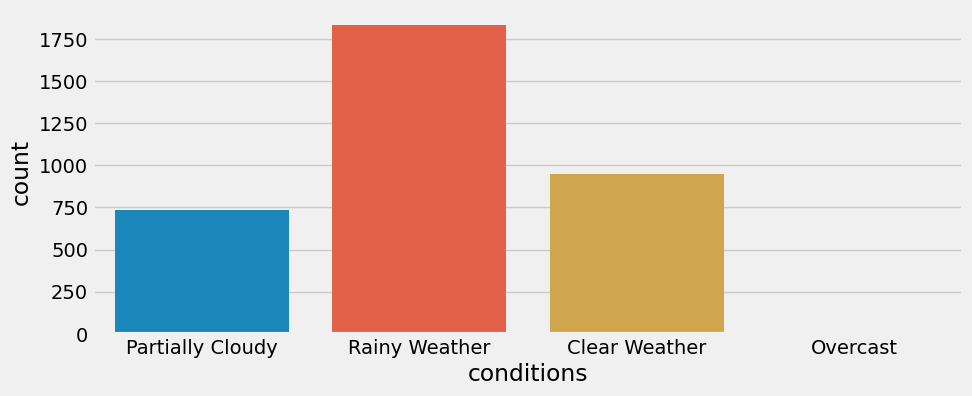

In [25]:
plt.figure(figsize=(10, 4))
sns.countplot(df, x="conditions")
plt.show();

In [26]:
## Mapping the risk level
risk_mapping = {
    'Partially Cloudy': 0,
    'Rainy Weather': 1,
    'Clear Weather': 2,
    'Overcast': 3
}

df["conditions"] = df["conditions"].map(risk_mapping)


In [27]:
## Dropping some other columns

df.drop(columns=["datetime", "preciptype", "sunrise", "sunset"], axis=1, inplace=True)

df = df.copy()


## Defining Numerical & Categorical features

In [28]:
X = df.drop(columns=["conditions"], axis=1)

y = df["conditions"]

In [29]:
numeric_features = [feature for feature in X.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in X.columns if df[feature].dtype == 'O']

In [30]:
print(f"Numerical Features are: ", numeric_features)

print("------------------------------------------------------------------------------")

print(f"Categorical Features are: ", categorical_features)

Numerical Features are:  ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase']
------------------------------------------------------------------------------
Categorical Features are:  []


In [31]:
## Checking the shape of the data

df.shape

(3530, 21)

In [32]:
## Impute the categorical columns

impute_cat_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cat_cols:
    mode = df[feat].mode().iloc[0]
    df[feat].fillna(mode, inplace=True)
    
    
## Impute for numerical columns

impute_num_cols = [x for x in df.select_dtypes(include=['float64', 'int64']).isna().sum()[df.select_dtypes(include=['float64', 'int64']).isna().sum() != 0].index.tolist()]
for feat in impute_num_cols:
    median = df[feat].median()
    df[feat].fillna(median, inplace=True)

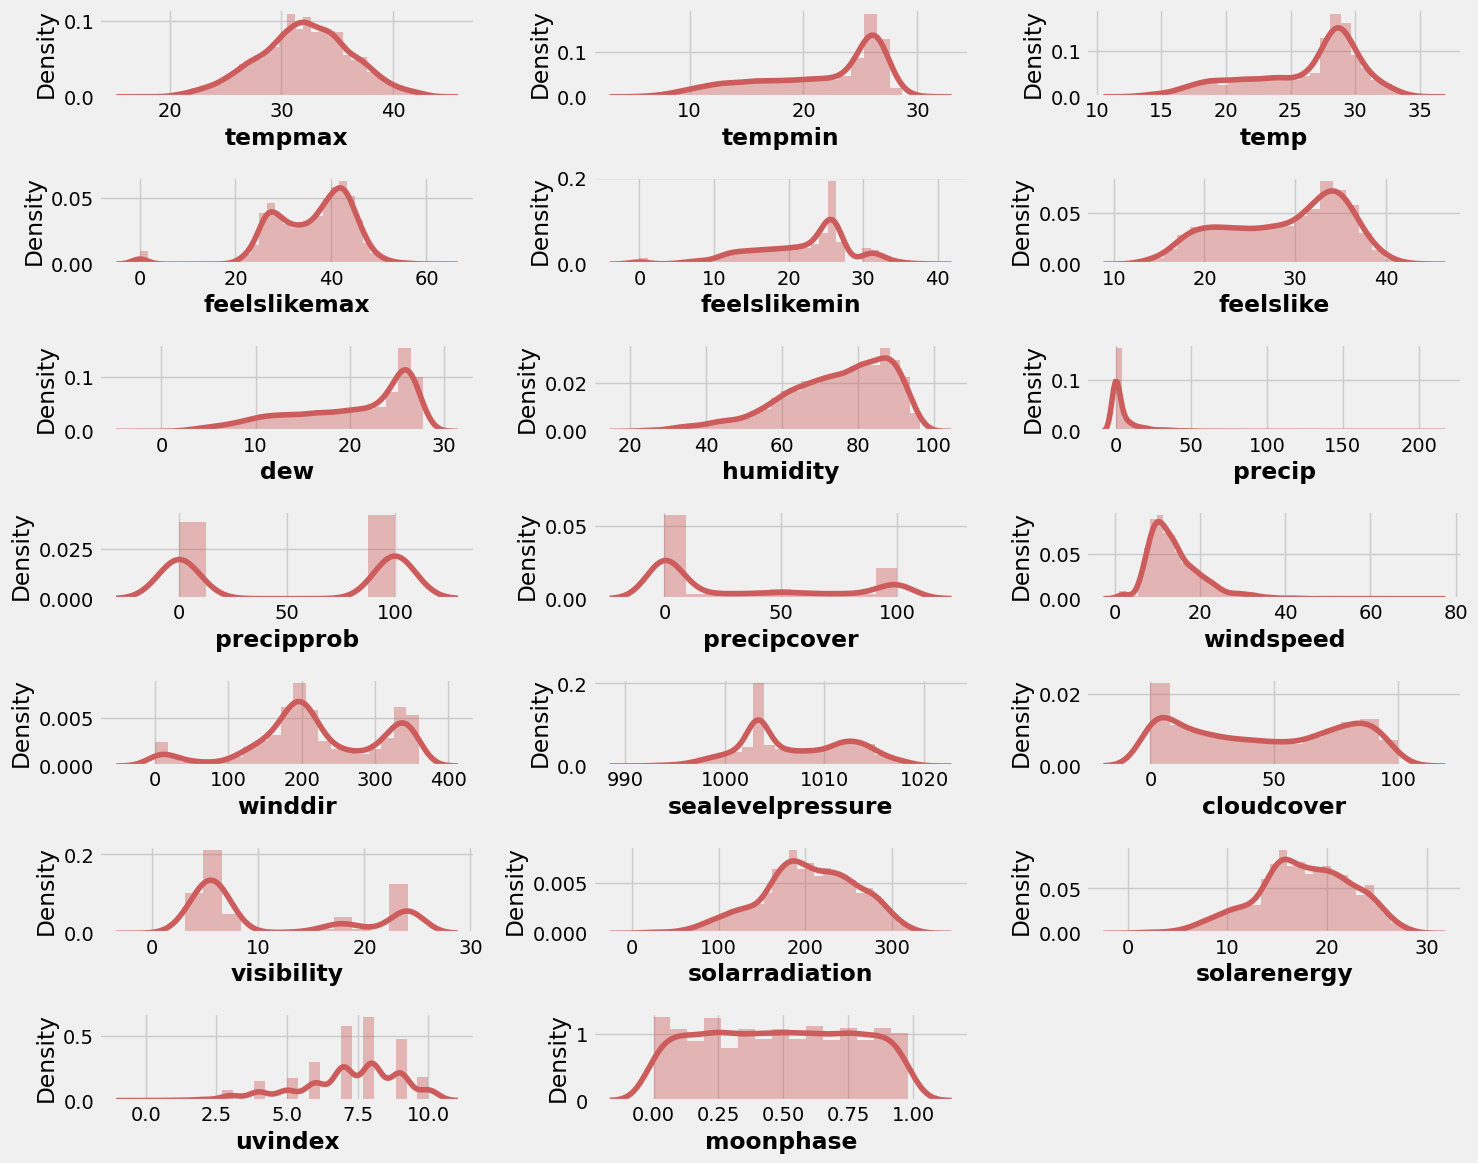

In [33]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

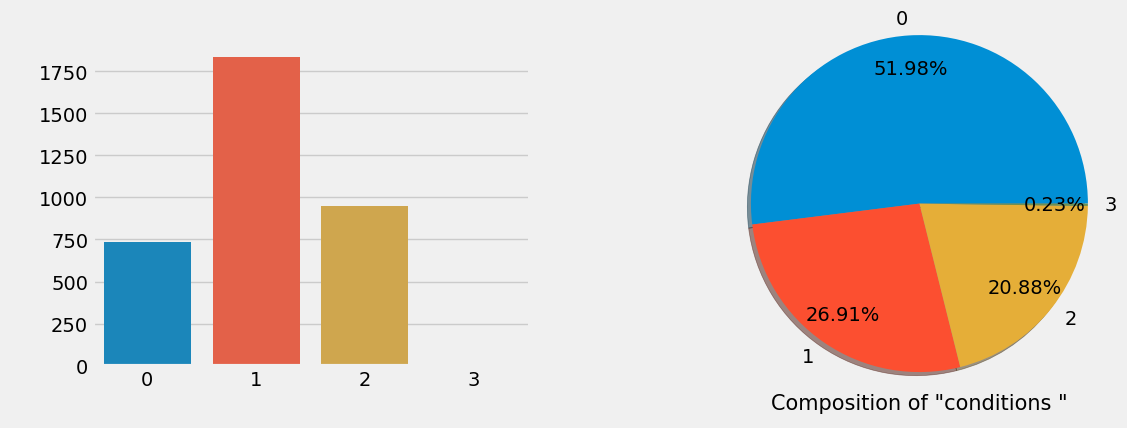

In [34]:
# checking the target
plt.figure(figsize=(12,4))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["conditions"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["conditions"].value_counts(),
        labels=list(df["conditions"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "conditions "', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

## Checking Multicollinearity

In [35]:
def remove_multicollinearity_and_save(data, threshold=0.8, save_path='data.csv'):
    # Compute the correlation matrix
    correlation_matrix = data.corr()

    # Create a mask for the upper triangle
    mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

    # Find multicollinear feature pairs
    multicollinear_features = set()
    for col in correlation_matrix.columns:
        correlated_cols = correlation_matrix.columns[mask[col]]
        for correlated_col in correlated_cols:
            multicollinear_features.add(col)
            multicollinear_features.add(correlated_col)
            print(f'Multicollinear Features: {col} and {correlated_col} (Correlation: {correlation_matrix.loc[col, correlated_col]:.2f})')

    # Remove multicollinear features
    new_data = data.drop(columns=multicollinear_features, axis=1)

    # Save the new DataFrame with the name 'df'
    new_data.to_csv(save_path, index=False)
    print(f'New DataFrame saved to {save_path} with the name "df"')

    # Plot the heatmap
    plt.figure(figsize=(25, 12))
    sns.heatmap(correlation_matrix, annot=True, linewidths=.5, mask=mask)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

Multicollinear Features: tempmax and temp (Correlation: 0.88)
Multicollinear Features: tempmin and temp (Correlation: 0.94)
Multicollinear Features: tempmin and feelslikemax (Correlation: 0.82)
Multicollinear Features: tempmin and feelslikemin (Correlation: 0.93)
Multicollinear Features: tempmin and feelslike (Correlation: 0.95)
Multicollinear Features: tempmin and dew (Correlation: 0.90)
Multicollinear Features: temp and tempmax (Correlation: 0.88)
Multicollinear Features: temp and tempmin (Correlation: 0.94)
Multicollinear Features: temp and feelslikemax (Correlation: 0.84)
Multicollinear Features: temp and feelslikemin (Correlation: 0.89)
Multicollinear Features: temp and feelslike (Correlation: 0.94)
Multicollinear Features: feelslikemax and tempmin (Correlation: 0.82)
Multicollinear Features: feelslikemax and temp (Correlation: 0.84)
Multicollinear Features: feelslikemax and feelslikemin (Correlation: 0.91)
Multicollinear Features: feelslikemax and feelslike (Correlation: 0.81)
Mu

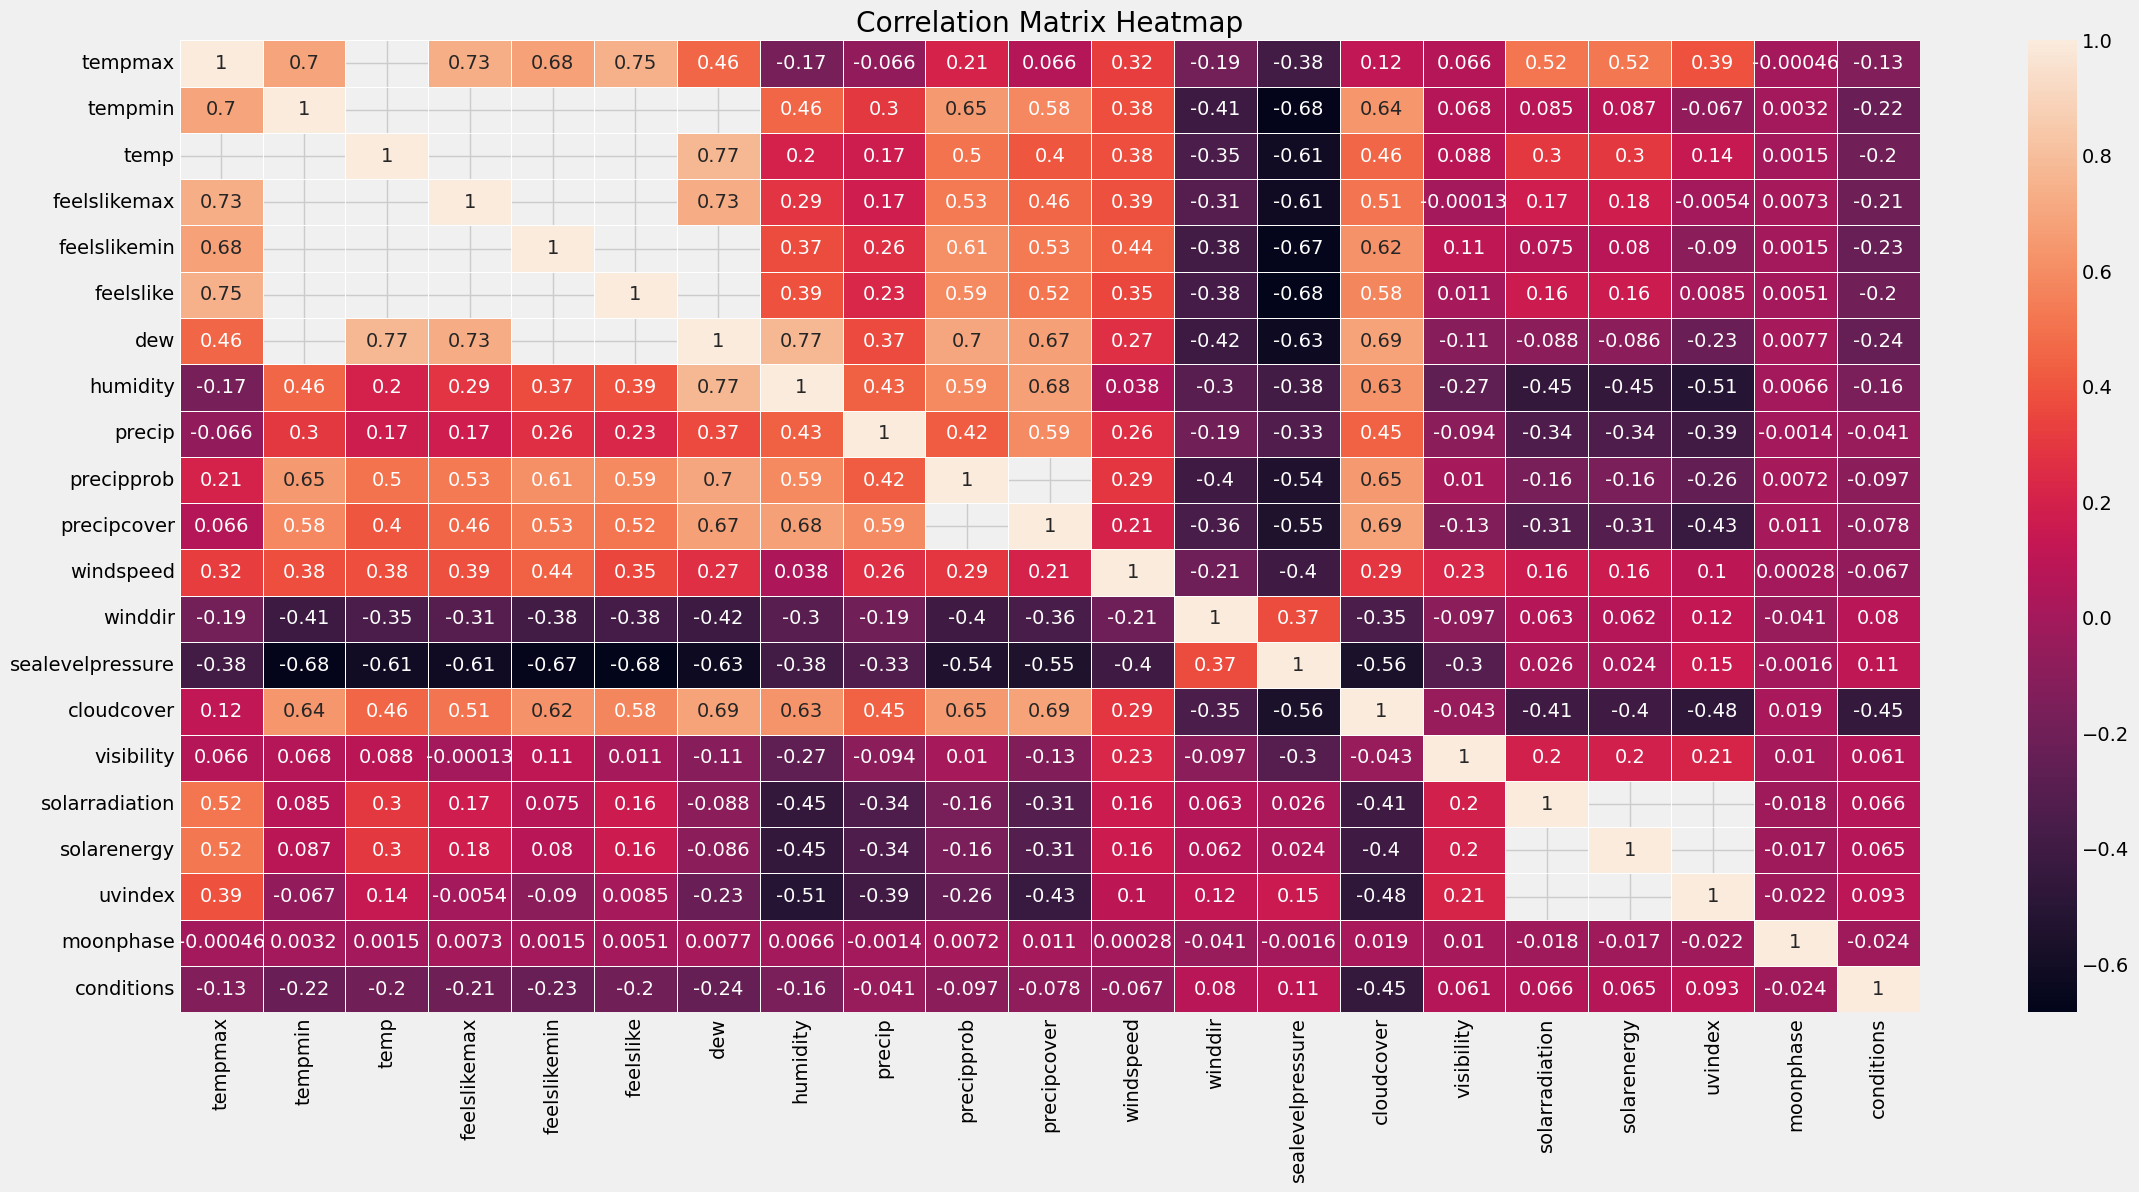

In [36]:
remove_multicollinearity_and_save(df)

In [37]:
df = pd.read_csv("/kaggle/working/data.csv")

In [38]:
df.head()

,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,conditions
0,58.3,0.0,13.0,356.8,1014.3,21.0,4.2,0.25,0
1,64.8,1.0,13.3,2.1,1014.3,32.3,5.2,0.27,1
2,72.7,0.2,10.1,340.7,1013.9,29.1,3.0,0.31,1
3,68.0,0.0,8.6,3.9,1013.7,23.7,4.9,0.34,0
4,68.5,0.4,7.2,8.9,1014.6,20.7,3.8,0.37,1


In [39]:
X = df.drop(columns=["conditions"], axis=1)

y = df["conditions"]

In [40]:
numeric_features = X.select_dtypes(exclude="object").columns
numeric_features

Index(['humidity', 'precip', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'moonphase'],
      dtype='object')

There are no categorical features

In [41]:
# Creating a ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ("numeric", Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features)
], remainder="drop")

## Train-Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train = transformer.fit_transform(X_train)

X_test = transformer.transform(X_test)

In [44]:
X_train.shape, X_test.shape

((2824, 8), (706, 8))

## Baseline Modelling

In [45]:
def evaluate_model(true, predicted):
    score_f1 = f1_score(true, predicted, average="weighted")
    accuracy = accuracy_score(true, predicted)

    return score_f1, accuracy

In [46]:
def fit_classification_models(X, y, test_size=0.2, random_state=42):

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipelines for XGBoost, RandomForest, and ExtraTrees classifiers
    pipelines = {
        'XGBoost': Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())]),
        'Random Forest': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', StandardScaler()), ('classifier', ExtraTreesClassifier())]),
    }

    # Fit and evaluate XGBoost, RandomForest, and ExtraTrees classifiers
    results = {}

    for classifier_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        results[classifier_name] = {'accuracy': accuracy, 'f1-score': f1}

    return results

In [47]:
results = fit_classification_models(X_train, y_train)

In [48]:
# Create a DataFrame from the results
df = pd.DataFrame(results).transpose()

# Sort the DataFrame by the F1-score in descending order
df_sorted = df.sort_values(by='f1-score', ascending=False)

# Display the sorted DataFrame
df_sorted

,accuracy,f1-score
XGBoost,0.998230,0.998228
Random Forest,0.998230,0.998228
ExtraTreesClassifier,0.946903,0.946280


In [49]:
model = XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

## Save the Model

In [50]:
# Save the model to an HDF5 file using joblib
filename = 'khulna_model.h5'
joblib.dump(model, filename)


# Load the model from the HDF5 file
loaded_model = joblib.load('khulna_model.h5')

In [51]:
# Make Prediction

y_new_pred = loaded_model.predict(X_test)

# Display or use the predictions
print("Predictions on new data:", y_new_pred)

Predictions on new data: [0 1 2 1 2 0 1 2 1 1 2 1 1 2 2 2 2 0 2 1 2 1 1 0 2 2 1 1 1 1 2 2 1 0 1 0 1
 2 0 1 1 0 2 2 1 2 2 2 2 2 1 2 1 1 1 1 0 0 1 0 2 1 1 2 2 1 2 1 2 2 1 0 2 0
 2 1 2 0 2 0 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 2 0 1 0 0
 0 1 2 1 0 1 0 1 0 1 2 1 2 0 1 1 2 0 1 2 1 1 1 1 2 0 1 2 1 2 1 2 1 0 2 1 1
 1 0 2 1 2 2 0 1 1 1 1 2 1 0 0 0 1 1 1 1 1 0 2 2 2 0 2 0 1 2 1 1 2 2 0 0 0
 1 1 2 2 0 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 2 1 2 1 1 0 1 0 2 1 1 2
 1 0 2 2 2 1 0 1 1 0 0 1 1 2 1 2 1 1 2 2 1 2 1 1 2 2 1 1 1 1 0 2 2 1 2 0 1
 0 1 1 2 2 0 0 2 1 2 2 0 1 1 1 0 0 1 1 1 1 1 1 2 0 1 1 1 1 0 0 1 1 0 1 2 2
 1 2 1 2 2 1 0 0 1 1 0 1 1 2 1 1 0 1 2 2 0 2 2 1 0 2 0 1 2 1 1 1 0 0 0 1 0
 0 1 1 1 1 2 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 2 1 1 1 1 1 1 0 1 0
 2 1 1 1 2 3 1 2 0 1 1 1 1 1 0 0 2 2 2 1 2 0 1 2 2 1 1 1 2 1 0 0 1 1 1 0 2
 0 0 0 1 1 1 1 2 1 1 0 1 1 2 0 0 1 2 0 1 0 0 2 0 1 1 0 2 0 2 0 1 1 0 1 1 2
 0 2 1 1 1 2 2 2 1 1 2 1 1 1 2 1 1 1 1 0 1 1 1 2 2 1 0 1 0 0 1 0 1 2 1 1 1
